
# Gender Prediction based on costumer behavior.
## ML Project 2
## Aleksandra Molchanova



In [0]:
!pip install yellowbrick

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-04de0631-1e5c-4795-9752-c17cf6cdac63/bin/python -m pip install --upgrade pip' command.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [0]:
file_location = "/FileStore/tables/shopping_trends_updated-1.csv"
file_type = "csv"


infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

df_spark = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df_pandas = df_spark.toPandas()

print(df_pandas)

     Customer ID Age  Gender Item Purchased     Category  \
0              1  55    Male         Blouse     Clothing   
1              2  19    Male        Sweater     Clothing   
2              3  50    Male          Jeans     Clothing   
3              4  21    Male        Sandals     Footwear   
4              5  45    Male         Blouse     Clothing   
...          ...  ..     ...            ...          ...   
3895        3896  40  Female         Hoodie     Clothing   
3896        3897  52  Female       Backpack  Accessories   
3897        3898  46  Female           Belt  Accessories   
3898        3899  44  Female          Shoes     Footwear   
3899        3900  52  Female        Handbag  Accessories   

     Purchase Amount (USD)       Location Size      Color  Season  \
0                       53       Kentucky    L       Gray  Winter   
1                       64          Maine    L     Maroon  Winter   
2                       73  Massachusetts    S     Maroon  Spring   
3  

In [0]:
df_pandas = df_pandas.drop(columns=['Customer ID'])

In [0]:
df_pandas

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [0]:
df_pandas.isnull().sum()

Out[47]: Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [0]:
df_pandas.duplicated().sum()

Out[48]: 0

In [0]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3900 non-null   object
 1   Gender                  3900 non-null   object
 2   Item Purchased          3900 non-null   object
 3   Category                3900 non-null   object
 4   Purchase Amount (USD)   3900 non-null   object
 5   Location                3900 non-null   object
 6   Size                    3900 non-null   object
 7   Color                   3900 non-null   object
 8   Season                  3900 non-null   object
 9   Review Rating           3900 non-null   object
 10  Subscription Status     3900 non-null   object
 11  Shipping Type           3900 non-null   object
 12  Discount Applied        3900 non-null   object
 13  Promo Code Used         3900 non-null   object
 14  Previous Purchases      3900 non-null   object
 15  Paym

In [0]:
df_pandas.describe()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,53,2,25,4,81,50,4,25,4,26,2,6,2,2,50,6,7
top,69,Male,Blouse,Clothing,94,Montana,M,Olive,Spring,3.4,No,Free Shipping,No,No,31,PayPal,Every 3 Months
freq,88,2652,171,1737,62,96,1755,177,999,182,2847,675,2223,2223,97,677,584


In [0]:
print(df_pandas.dtypes)

Age                       object
Gender                    object
Item Purchased            object
Category                  object
Purchase Amount (USD)     object
Location                  object
Size                      object
Color                     object
Season                    object
Review Rating             object
Subscription Status       object
Shipping Type             object
Discount Applied          object
Promo Code Used           object
Previous Purchases        object
Payment Method            object
Frequency of Purchases    object
dtype: object


In [0]:
df_pandas['Item Purchased'].value_counts()

Out[52]: Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

In [0]:

categorical_columns = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 
                       'Subscription Status', 'Shipping Type', 'Discount Applied', 
                       'Promo Code Used', 'Payment Method']

for col in categorical_columns:
    df_pandas[col] = df_pandas[col].astype('category')

df_pandas.describe(include=['category']).T


,count,unique,top,freq
Gender,3900,2,Male,2652
Category,3900,4,Clothing,1737
Location,3900,50,Montana,96
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Shipping Type,3900,6,Free Shipping,675
Discount Applied,3900,2,No,2223
Promo Code Used,3900,2,No,2223


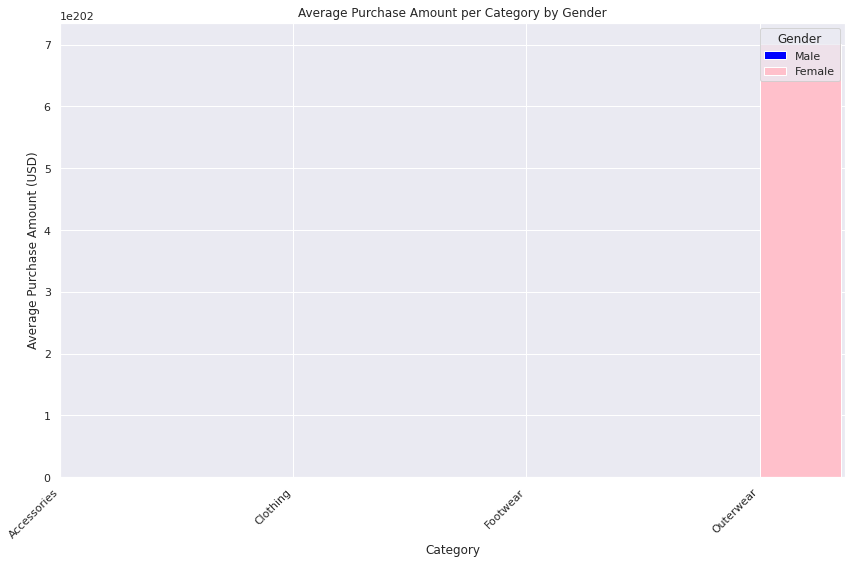

In [0]:
df_aggregated = df_pandas.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].mean().reset_index()

pivot_data = df_aggregated.pivot(index='Category', columns='Gender', values='Purchase Amount (USD)')

plt.figure(figsize=(12, 8))

bar_width = 0.35
index = range(len(pivot_data))  

plt.bar(index, pivot_data['Male'], width=bar_width, color='blue', label='Male')
plt.bar([i + bar_width for i in index], pivot_data['Female'], width=bar_width, color='pink', label='Female')

plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount per Category by Gender')
plt.xticks([i + bar_width / 2 for i in index], pivot_data.index, rotation=45, ha='right')
plt.legend(title="Gender")

plt.tight_layout()
plt.show()

       Category  Gender Discount Applied  Count
0   Accessories  Female               No    392
1   Accessories  Female              Yes      0
2   Accessories    Male               No    305
3   Accessories    Male              Yes    543
4      Clothing  Female               No    556
5      Clothing  Female              Yes      0
6      Clothing    Male               No    450
7      Clothing    Male              Yes    731
8      Footwear  Female               No    199
9      Footwear  Female              Yes      0
10     Footwear    Male               No    141
11     Footwear    Male              Yes    259
12    Outerwear  Female               No    101
13    Outerwear  Female              Yes      0
14    Outerwear    Male               No     79
15    Outerwear    Male              Yes    144


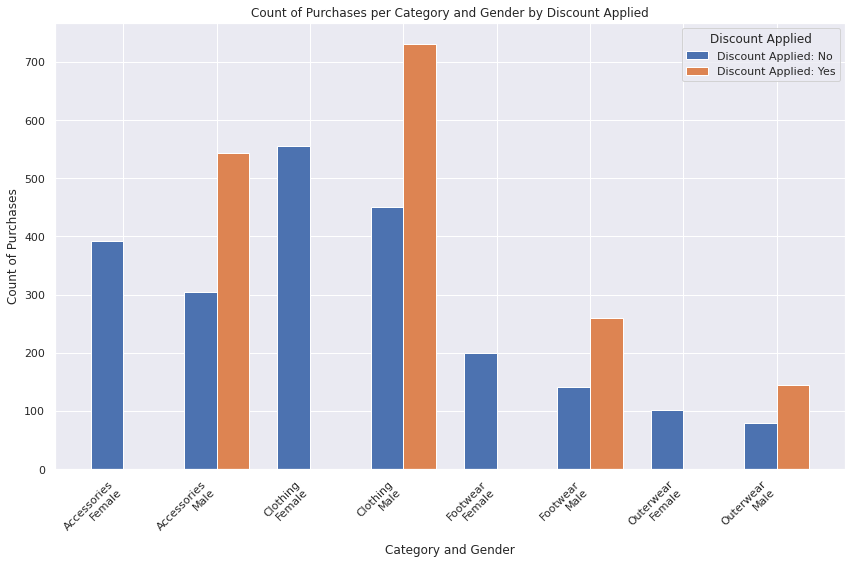

In [0]:
count_per_category_gender_discount = df_pandas.groupby(['Category', 'Gender', 'Discount Applied'])['Purchase Amount (USD)'].size().reset_index(name='Count')
print(count_per_category_gender_discount)

pivot_data = count_per_category_gender_discount.pivot_table(index=['Category', 'Gender'], columns='Discount Applied', values='Count', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))

bar_width = 0.35
index = range(len(pivot_data))

discount_labels = pivot_data.columns
for i, discount in enumerate(discount_labels):
    plt.bar([x + (i * bar_width) for x in index], pivot_data[discount], width=bar_width, label=f'Discount Applied: {discount}', color=f'C{i}')

plt.xlabel('Category and Gender')
plt.ylabel('Count of Purchases')
plt.title('Count of Purchases per Category and Gender by Discount Applied')
plt.xticks([i + bar_width * (len(discount_labels) - 1) / 2 for i in index], [f'{cat}\n{gen}' for cat, gen in pivot_data.index], rotation=45, ha='right')
plt.legend(title="Discount Applied")

plt.tight_layout()
plt.show()


   Gender Discount Applied                                 Total Amount Spent
0  Female               No  2036708376814735859698528471954775284464282141...
1  Female              Yes                                                  0
2    Male               No  3571523795975793487570267330617588679569874167...
3    Male              Yes  5364739049208534973134687251538136384890516237...


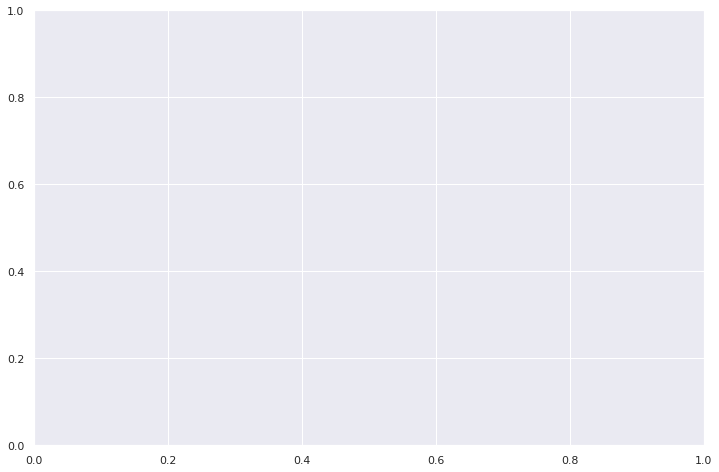

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File <command-3862521383700742>:10
      8 discount_labels = pivot_data.columns
      9 for i, discount in enumerate(discount_labels):
---> 10     plt.bar([x + (i * bar_width) for x in index], pivot_data[discount], width=bar_width, label=f'Discount Applied: {discount}', color=f'C{i}')
     12 plt.xlabel('Category and Gender')
     13 plt.ylabel('Total Amount Spent (USD)')

File /databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py:2387, in bar(x, height, width, bottom, align, data, **kwargs)
   2383 @_copy_docstring_and_deprecators(Axes.bar)
   2384 def bar(
   2385         x, height, width=0.8, bottom=None, *, align='center',
   2386         data=None, **kwargs):
-> 2387     return gca().bar(
   2388         x, height, width=width, bottom=bottom, align=align,
   2389         **({"data": data} if data is not None else {}),

In [0]:
amount_spent_per_category_gender_discount = df_pandas.groupby(['Gender', 'Discount Applied'])['Purchase Amount (USD)'].sum().reset_index(name='Total Amount Spent')
print(amount_spent_per_category_gender_discount)
pivot_data = amount_spent_per_category_gender_discount.pivot_table(index=['Discount Applied', 'Gender'], columns='Discount Applied', values='Total Amount Spent', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = range(len(pivot_data))
discount_labels = pivot_data.columns
for i, discount in enumerate(discount_labels):
    plt.bar([x + (i * bar_width) for x in index], pivot_data[discount], width=bar_width, label=f'Discount Applied: {discount}', color=f'C{i}')

plt.xlabel('Category and Gender')
plt.ylabel('Total Amount Spent (USD)')
plt.title('Total Amount Spent per Category and Gender by Discount Applied')
plt.xticks([i + bar_width * (len(discount_labels) - 1) / 2 for i in index], [f'{cat}\n{gen}' for cat, gen in pivot_data.index], rotation=45, ha='right')
plt.legend(title="Discount Applied")

plt.tight_layout()
plt.show()


In [0]:
amount_per_freq_gender = df_pandas.groupby(['Gender', 'Frequency of Purchases'])['Purchase Amount (USD)'].sum().reset_index(name='Total Purchase Amount (USD)')

print(amount_per_freq_gender)
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(amount_per_freq_gender))
sns.barplot(x='Frequency of Purchases', y='Total Purchase Amount (USD)', hue='Gender', data=amount_per_freq_gender, palette='Set1')

plt.xlabel('Frequency of Purchases')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount per Frequency of Purchases and Gender')

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Gender")
plt.show()



In [0]:
amount_per_freq_gender = df_pandas.groupby(['Gender', 'Frequency of Purchases'])['Purchase Amount (USD)'].mean().reset_index(name='Average Purchase Amount (USD)')

print(amount_per_freq_gender)

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency of Purchases', y='Average Purchase Amount (USD)', hue='Gender', data=amount_per_freq_gender, palette='Set1')

plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount per Frequency of Purchases and Gender')

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Gender")
plt.show()


In [0]:
amount_per_shipping_gender = df_pandas.groupby(['Shipping Type', 'Gender'])['Purchase Amount (USD)'].sum().reset_index(name='Total Purchase Amount (USD)')

print(amount_per_shipping_gender)

plt.figure(figsize=(12, 8))
sns.barplot(x='Shipping Type', y='Total Purchase Amount (USD)', hue='Gender', data=amount_per_shipping_gender, palette='Set1')
plt.xlabel('Shipping Type')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount per Shipping Type and Gender')

plt.xticks(rotation=45)  
plt.tight_layout()
plt.legend(title="Gender")
plt.show()


In [0]:
purchase_count_per_shipping_gender = df_pandas.groupby(['Shipping Type', 'Gender']).size().reset_index(name='Purchase Count')

print(purchase_count_per_shipping_gender)

plt.figure(figsize=(12, 8))
sns.barplot(x='Shipping Type', y='Purchase Count', hue='Gender', data=purchase_count_per_shipping_gender, palette='Set1')
plt.xlabel('Shipping Type')
plt.ylabel('Purchase Count')
plt.title('Count of Purchases per Shipping Type and Gender')

plt.xticks(rotation=45)  
plt.tight_layout()
plt.legend(title="Gender")
plt.show()


In [0]:
avg_purchase_per_category_gender = df_pandas.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].mean().reset_index()
print(avg_purchase_per_category_gender)

pivot_data = avg_purchase_per_category_gender.pivot(index='Category', columns='Gender', values='Purchase Amount (USD)')

plt.figure(figsize=(12, 8))

bar_width = 0.35 
index = range(len(pivot_data))  

plt.bar(index, pivot_data['Male'], width=bar_width, color='blue', label='Male')
plt.bar([i + bar_width for i in index], pivot_data['Female'], width=bar_width, color='pink', label='Female')

plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount per Category by Gender')
plt.xticks([i + bar_width / 2 for i in index], pivot_data.index, rotation=45, ha='right')
plt.legend(title="Gender")

plt.tight_layout()
plt.show()

In [0]:
df_pandas['Purchase Amount (USD)'] = pd.to_numeric(df_pandas['Purchase Amount (USD)'], errors='coerce')

avg_purchase_per_payment_method_gender = df_pandas.groupby(['Payment Method', 'Gender'])['Purchase Amount (USD)'].mean().reset_index()

pivot_data = avg_purchase_per_payment_method_gender.pivot(index='Payment Method', columns='Gender', values='Purchase Amount (USD)')

plt.figure(figsize=(12, 8))

bar_width = 0.35  
index = range(len(pivot_data))  

plt.bar(index, pivot_data['Male'], width=bar_width, color='blue', label='Male')
plt.bar([i + bar_width for i in index], pivot_data['Female'], width=bar_width, color='pink', label='Female')

plt.xlabel('Payment Method')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount per Payment Method by Gender')
plt.xticks([i + bar_width / 2 for i in index], pivot_data.index, rotation=45, ha='right')
plt.legend(title="Gender")

plt.tight_layout()
plt.show()


In [0]:
df_pandas['Purchase Amount (USD)'] = pd.to_numeric(df_pandas['Purchase Amount (USD)'], errors='coerce')
df_pandas['Review Rating'] = pd.to_numeric(df_pandas['Review Rating'], errors='coerce')

sns.set(style='whitegrid')

plt.figure(figsize=(10, 5))
sns.histplot(df_pandas['Purchase Amount (USD)'], bins=30, kde=True)
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()


In [0]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df_pandas)
plt.title('Box Plot of Purchase Amount (USD) by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

In [0]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Gender', y='Review Rating', data=df_pandas)
plt.title('Box Plot of Review Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Review Rating')
plt.show()

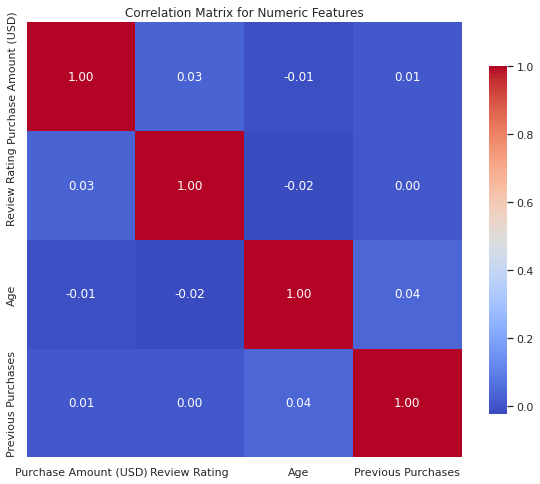

In [0]:
numeric_columns = ['Purchase Amount (USD)', 'Review Rating',  'Age', 'Previous Purchases']
for column in numeric_columns:
    df_pandas[column] = pd.to_numeric(df_pandas[column], errors='coerce')

correlation_data = df_pandas[numeric_columns]

correlation_data = correlation_data.dropna()

if correlation_data.empty:
    print("Correlation data is empty after dropping NaN values.")
else:
    correlation_matrix = correlation_data.corr()
    sns.set(style='whitegrid')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix for Numeric Features')
    plt.show()


In [0]:
columns_to_keep = ['Gender', 'Category', 'Size', 'Season', 'Color', 'Payment Method', 'Age', 'Shipping Type', 'Discount Applied']

df_filtered = df_pandas[columns_to_keep]

print(df_filtered.head())

  Gender  Category Size  Season      Color Payment Method  Age  Shipping Type  \
0   Male  Clothing    L  Winter       Gray          Venmo   55        Express   
1   Male  Clothing    L  Winter     Maroon           Cash   19        Express   
2   Male  Clothing    S  Spring     Maroon    Credit Card   50  Free Shipping   
3   Male  Footwear    M  Spring     Maroon         PayPal   21   Next Day Air   
4   Male  Clothing    M  Spring  Turquoise         PayPal   45  Free Shipping   

  Discount Applied  
0              Yes  
1              Yes  
2              Yes  
3              Yes  
4              Yes  


In [0]:
df_filtered

,Gender,Category,Size,Season,Color,Payment Method,Age,Shipping Type,Discount Applied
0,Male,Clothing,L,Winter,Gray,Venmo,55,Express,Yes
1,Male,Clothing,L,Winter,Maroon,Cash,19,Express,Yes
2,Male,Clothing,S,Spring,Maroon,Credit Card,50,Free Shipping,Yes
3,Male,Footwear,M,Spring,Maroon,PayPal,21,Next Day Air,Yes
4,Male,Clothing,M,Spring,Turquoise,PayPal,45,Free Shipping,Yes
...,...,...,...,...,...,...,...,...,...
3895,Female,Clothing,L,Summer,Turquoise,Venmo,40,2-Day Shipping,No
3896,Female,Accessories,L,Spring,White,Bank Transfer,52,Store Pickup,No
3897,Female,Accessories,L,Spring,Green,Venmo,46,Standard,No
3898,Female,Footwear,S,Summer,Brown,Venmo,44,Express,No


# Decision Trees

## Model 1


In [0]:
df_filtered.columns = df_filtered.columns.str.strip()

print("Columns in df_filtered:", df_filtered.columns.tolist())

df_dummies = pd.get_dummies(df_filtered, drop_first=True)

X = df_dummies.drop('Gender_Male', axis=1)  
y = df_dummies['Gender_Male']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

Columns in df_filtered: ['Gender', 'Category', 'Size', 'Season', 'Color', 'Payment Method', 'Age', 'Shipping Type', 'Discount Applied']
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       228
           1       0.84      0.80      0.82       552

    accuracy                           0.75       780
   macro avg       0.70      0.72      0.71       780
weighted avg       0.76      0.75      0.76       780

Accuracy: 75.26%


In [0]:
print(df_filtered['Age'].dtype)
print(df_filtered['Age'].unique())

int64
[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]


In [0]:
df_filtered['Age'] = pd.to_numeric(df_filtered['Age'], errors='coerce')


In [0]:

#df_filtered = df_filtered.dropna(subset=['Age'])



In [0]:
bins = [0, 9, 19, 29, 39, 49, 59, 100]
labels = ['1-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']

df_filtered['Age Group'] = pd.cut(df_filtered['Age'], bins=bins, labels=labels, right=True)

df_dummies = pd.get_dummies(df_filtered.drop('Age', axis=1), drop_first=True)

In [0]:
df_filtered = df_filtered.drop(columns=['Age'])


In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [0]:
df_filtered.columns = df_filtered.columns.str.strip()

print("Columns in df_filtered:", df_filtered.columns.tolist())

df_dummies = pd.get_dummies(df_filtered, drop_first=True)

X = df_dummies.drop('Gender_Male', axis=1)  
y = df_dummies['Gender_Male']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

Columns in df_filtered: ['Gender', 'Category', 'Size', 'Season', 'Color', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Age Group']
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       228
           1       0.81      0.79      0.80       552

    accuracy                           0.72       780
   macro avg       0.66      0.67      0.67       780
weighted avg       0.73      0.72      0.72       780

Accuracy: 71.92%


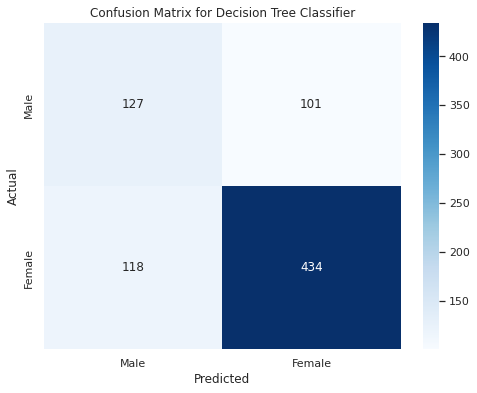

In [0]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Feature Importances:
                        Feature  Importance
43         Discount Applied_Yes    0.356762
0             Category_Clothing    0.033320
3                        Size_M    0.029773
7                 Season_Summer    0.025164
36        Payment Method_PayPal    0.024141
33          Payment Method_Cash    0.021774
6                 Season_Spring    0.021736
1             Category_Footwear    0.020289
45              Age Group_20-29    0.019065
2            Category_Outerwear    0.018687
47              Age Group_40-49    0.018592
41       Shipping Type_Standard    0.018327
48              Age Group_50-59    0.017510
5                       Size_XL    0.017505
34   Payment Method_Credit Card    0.017443
35    Payment Method_Debit Card    0.016648
42   Shipping Type_Store Pickup    0.016504
49                Age Group_60+    0.015251
15                   Color_Gray    0.014298
46              Age Group_30-39    0.013460
27                 Color_Silver    0.013442
8          

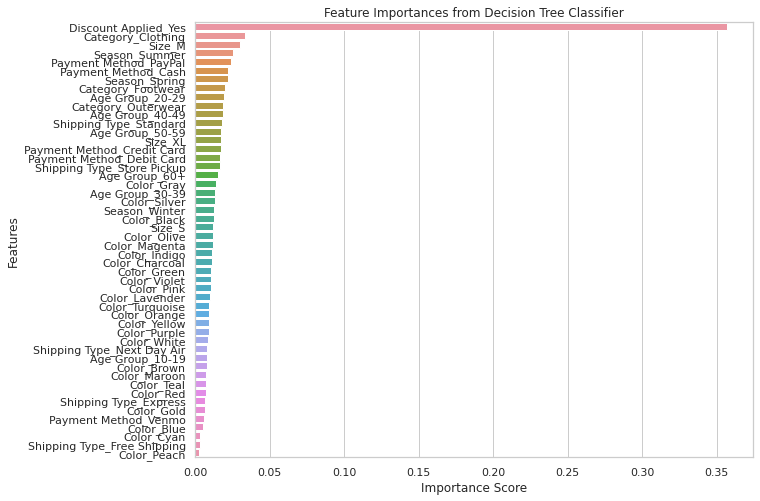

In [0]:
clf.fit(X_train, y_train)

importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

##Model 2


In [0]:
df_filtered.columns = df_filtered.columns.str.strip()

print("Columns in df_filtered:", df_filtered.columns.tolist())

df_dummies = pd.get_dummies(df_filtered, drop_first=True)

X = df_dummies.drop('Gender_Male', axis=1)  
y = df_dummies['Gender_Male']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

clf = DecisionTreeClassifier(random_state=62, max_depth=5)  

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')


Columns in df_filtered: ['Gender', 'Category', 'Size', 'Season', 'Color', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Age Group']
              precision    recall  f1-score   support

           0       0.56      0.98      0.71       362
           1       0.99      0.65      0.78       808

    accuracy                           0.75      1170
   macro avg       0.77      0.82      0.75      1170
weighted avg       0.85      0.75      0.76      1170

Accuracy: 75.30%


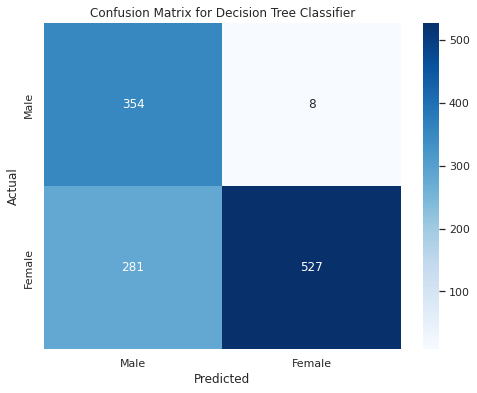

In [0]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Feature Importances:
                        Feature  Importance
43         Discount Applied_Yes    0.942236
4                        Size_S    0.010326
10                   Color_Blue    0.008064
23                  Color_Peach    0.005543
32                 Color_Yellow    0.004871
6                 Season_Spring    0.004712
37         Payment Method_Venmo    0.004152
44              Age Group_10-19    0.003886
39  Shipping Type_Free Shipping    0.003343
14                   Color_Gold    0.003323
8                 Season_Winter    0.003264
47              Age Group_40-49    0.003173
3                        Size_M    0.003109
31                  Color_White    0.000000
34   Payment Method_Credit Card    0.000000
35    Payment Method_Debit Card    0.000000
36        Payment Method_PayPal    0.000000
33          Payment Method_Cash    0.000000
0             Category_Clothing    0.000000
38        Shipping Type_Express    0.000000
40   Shipping Type_Next Day Air    0.000000
41       Sh

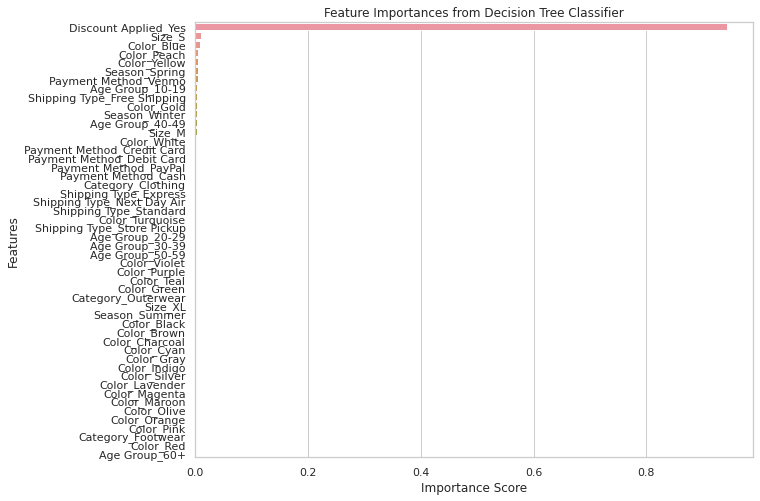

In [0]:
clf.fit(X_train, y_train)

importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Model 3

In [0]:
df_filtered.columns = df_filtered.columns.str.strip()

print("Columns in df_filtered:", df_filtered.columns.tolist())

df_dummies = pd.get_dummies(df_filtered, drop_first=True)

X = df_dummies.drop('Gender_Male', axis=1)  
y = df_dummies['Gender_Male']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=66)

clf = DecisionTreeClassifier(random_state=66, max_depth=3)  

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

Columns in df_filtered: ['Gender', 'Category', 'Size', 'Season', 'Color', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Age Group']
              precision    recall  f1-score   support

           0       0.57      0.96      0.72       261
           1       0.97      0.63      0.77       519

    accuracy                           0.74       780
   macro avg       0.77      0.80      0.74       780
weighted avg       0.84      0.74      0.75       780

Accuracy: 74.36%


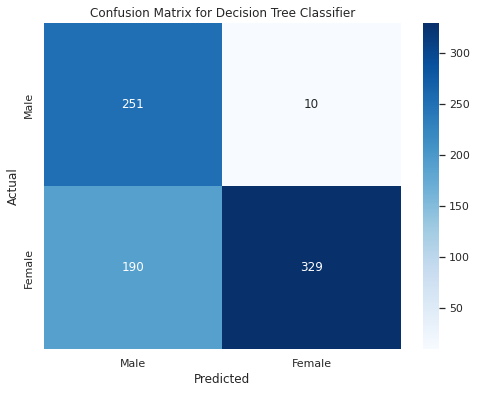

In [0]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Feature Importances:
                        Feature  Importance
43         Discount Applied_Yes    0.982983
39  Shipping Type_Free Shipping    0.009369
46              Age Group_30-39    0.004603
23                  Color_Peach    0.003045
0             Category_Clothing    0.000000
36        Payment Method_PayPal    0.000000
28                   Color_Teal    0.000000
29              Color_Turquoise    0.000000
30                 Color_Violet    0.000000
31                  Color_White    0.000000
32                 Color_Yellow    0.000000
33          Payment Method_Cash    0.000000
34   Payment Method_Credit Card    0.000000
35    Payment Method_Debit Card    0.000000
38        Shipping Type_Express    0.000000
37         Payment Method_Venmo    0.000000
26                    Color_Red    0.000000
40   Shipping Type_Next Day Air    0.000000
41       Shipping Type_Standard    0.000000
42   Shipping Type_Store Pickup    0.000000
44              Age Group_10-19    0.000000
45         

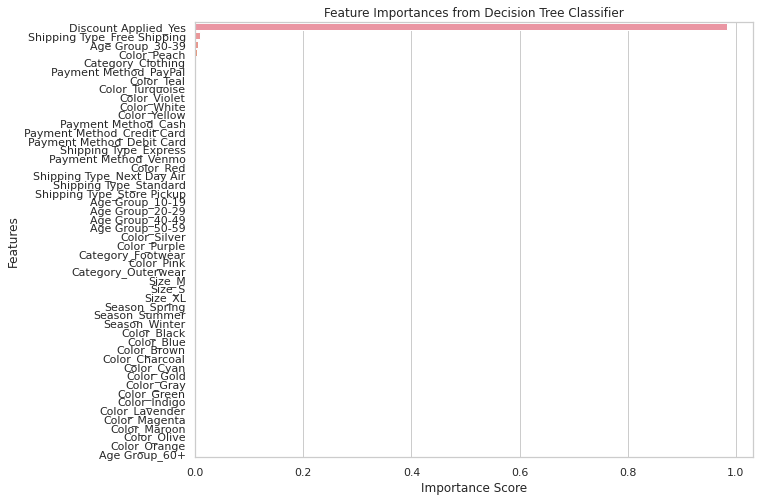

In [0]:
clf.fit(X_train, y_train)

importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Model 4


In [0]:
df_filtered.columns = df_filtered.columns.str.strip()

print("Columns in df_filtered:", df_filtered.columns.tolist())

df_dummies = pd.get_dummies(df_filtered, drop_first=True)

X = df_dummies.drop('Gender_Male', axis=1)  
y = df_dummies['Gender_Male']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=35)

clf = DecisionTreeClassifier(random_state=35, max_depth=15)  

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

Columns in df_filtered: ['Gender', 'Category', 'Size', 'Season', 'Color', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Age Group']
              precision    recall  f1-score   support

           0       0.54      0.66      0.59       307
           1       0.82      0.74      0.78       668

    accuracy                           0.71       975
   macro avg       0.68      0.70      0.69       975
weighted avg       0.73      0.71      0.72       975

Accuracy: 71.38%


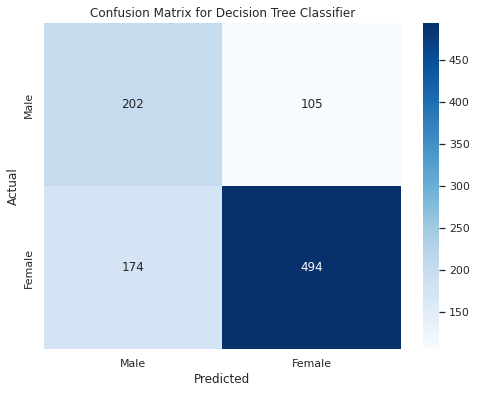

In [0]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Feature Importances:
                        Feature  Importance
43         Discount Applied_Yes    0.558522
6                 Season_Spring    0.023706
0             Category_Clothing    0.020144
42   Shipping Type_Store Pickup    0.018792
7                 Season_Summer    0.017234
8                 Season_Winter    0.016226
23                  Color_Peach    0.014068
41       Shipping Type_Standard    0.013952
33          Payment Method_Cash    0.013763
1             Category_Footwear    0.012938
16                  Color_Green    0.012042
25                 Color_Purple    0.011144
47              Age Group_40-49    0.010971
4                        Size_S    0.010855
28                   Color_Teal    0.010479
40   Shipping Type_Next Day Air    0.010422
3                        Size_M    0.009122
18               Color_Lavender    0.008772
32                 Color_Yellow    0.008747
35    Payment Method_Debit Card    0.008670
19                Color_Magenta    0.008645
2          

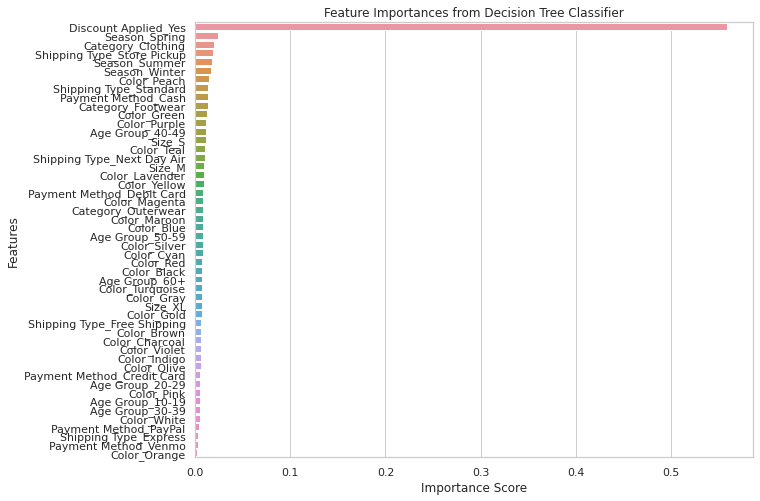

In [0]:
clf.fit(X_train, y_train)

importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# k-Nearest Neighbors (k-NN)

## Model 1


In [0]:
X = pd.get_dummies(df_filtered.drop(['Gender', 'Category', 'Size', 'Season', 'Color', 'Payment Method', 'Shipping Type','Age Group'], axis=1), drop_first=True)
y = df_filtered['Gender'].apply(lambda x: 1 if x == 'Female' else 0) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3) 

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       834
           1       0.00      0.00      0.00       336

    accuracy                           0.71      1170
   macro avg       0.36      0.50      0.42      1170
weighted avg       0.51      0.71      0.59      1170

Accuracy: 71.28%


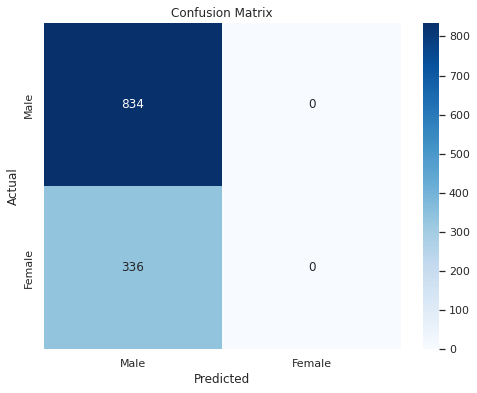

In [0]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

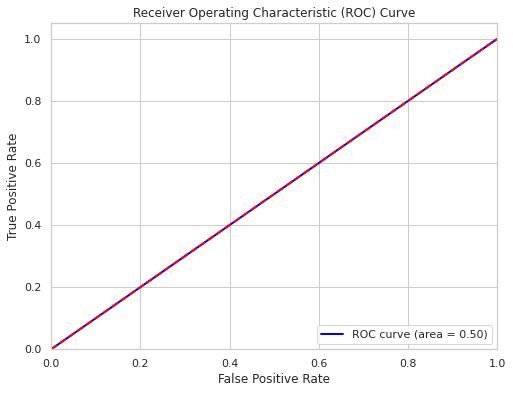

In [0]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

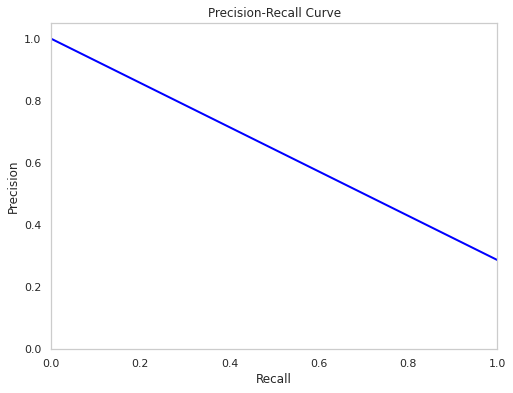

In [0]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

                Feature  Importance
0  Discount Applied_Yes         0.0


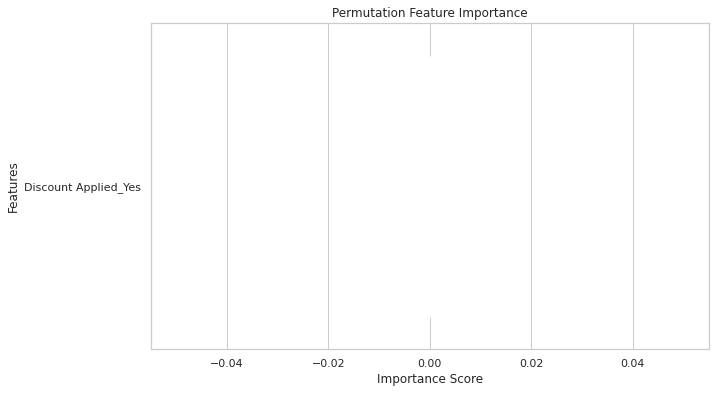

In [0]:
knn.fit(X_train, y_train)

result = permutation_importance(knn, X_test, y_test, n_repeats=15, random_state=30)

if len(X.columns) == len(result.importances_mean):
    perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
    perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

    print(perm_importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
    plt.title('Permutation Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print("Mismatch in lengths of features and importances.")

## Model 2


In [0]:

X = pd.get_dummies(df_filtered.drop(['Gender', 'Category', 'Size', 'Season', 'Color', 'Payment Method', 'Shipping Type','Age Group', 'Discount Applied'], axis=1), drop_first=True)
y = df_filtered['Gender'].apply(lambda x: 1 if x == 'Female' else 0) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=6) 

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       779
           1       0.62      0.37      0.46       391

    accuracy                           0.71      1170
   macro avg       0.68      0.63      0.64      1170
weighted avg       0.70      0.71      0.69      1170

Accuracy: 71.45%


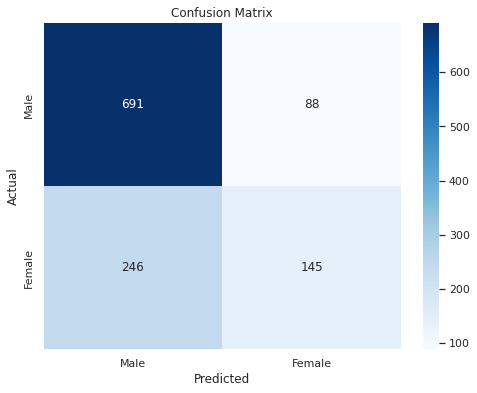

In [0]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

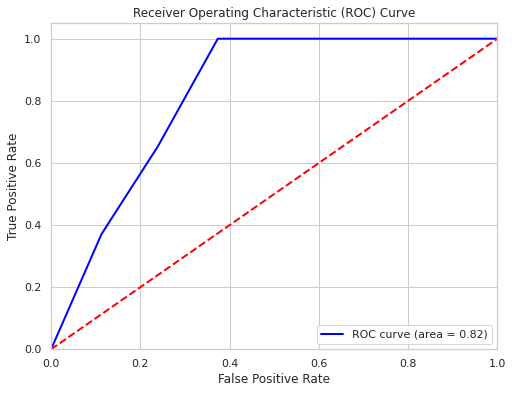

In [0]:
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

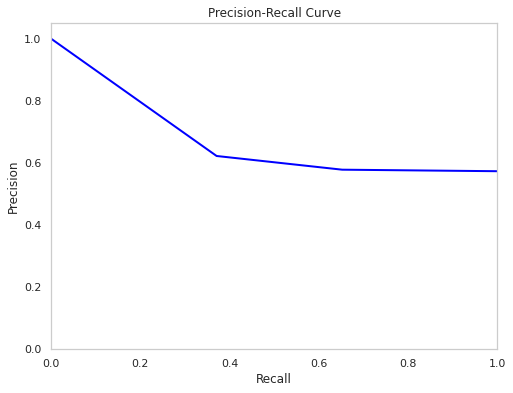

In [0]:
precision, recall, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

                      Feature  Importance
5        Discount Applied_Yes    0.102194
4        Payment Method_Venmo    0.025755
1  Payment Method_Credit Card    0.006239
0         Payment Method_Cash    0.002991
2   Payment Method_Debit Card    0.002165
3       Payment Method_PayPal    0.000000


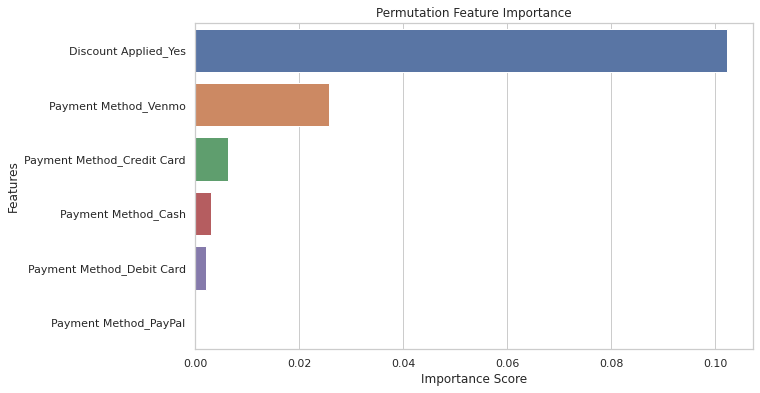

In [0]:
knn.fit(X_train, y_train)

result = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42)

if len(X.columns) == len(result.importances_mean):
    perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
    perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

    print(perm_importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
    plt.title('Permutation Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print("Mismatch in lengths of features and importances.")

## Modle 3

In [0]:

X = pd.get_dummies(df_filtered.drop(['Gender', 'Category', 'Size', 'Season',  'Payment Method', 'Shipping Type','Age Group'], axis=1), drop_first=True)
y = df_filtered['Gender'].apply(lambda x: 1 if x == 'Female' else 0) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree') 

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       530
           1       0.57      0.74      0.65       250

    accuracy                           0.74       780
   macro avg       0.71      0.74      0.72       780
weighted avg       0.77      0.74      0.75       780

Accuracy: 73.85%


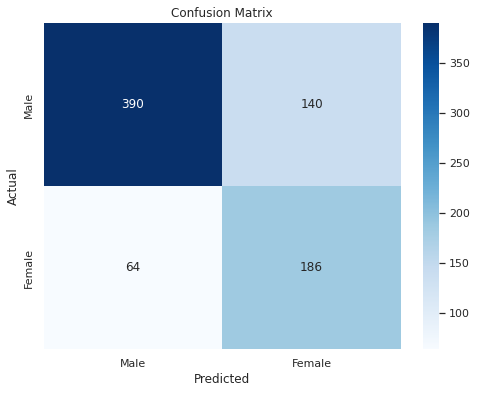

In [0]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

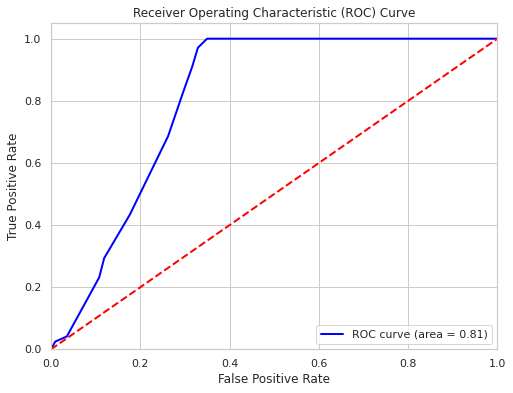

In [0]:
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

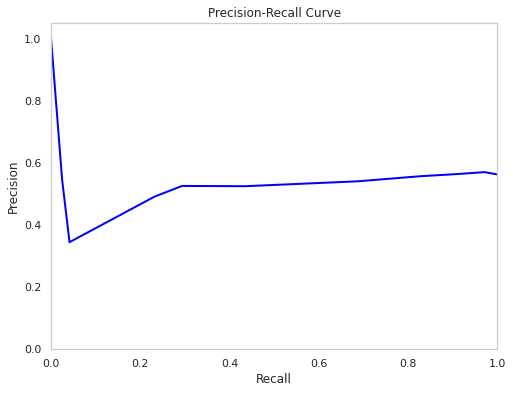

In [0]:
precision, recall, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

                 Feature  Importance
24  Discount Applied_Yes    0.204744
7            Color_Green    0.009701
12           Color_Olive    0.008974
0            Color_Black    0.008718
23          Color_Yellow    0.008547
2            Color_Brown    0.007692
17             Color_Red    0.006581
10         Color_Magenta    0.005983
19            Color_Teal    0.005299
3         Color_Charcoal    0.003974
22           Color_White    0.003291
4             Color_Cyan    0.002949
16          Color_Purple    0.002564
5             Color_Gold    0.002350
11          Color_Maroon    0.002350
14           Color_Peach    0.001966
15            Color_Pink    0.001667
21          Color_Violet    0.000983
13          Color_Orange    0.000769
1             Color_Blue    0.000598
8           Color_Indigo    0.000256
9         Color_Lavender   -0.001325
6             Color_Gray   -0.002308
18          Color_Silver   -0.002350
20       Color_Turquoise   -0.008291


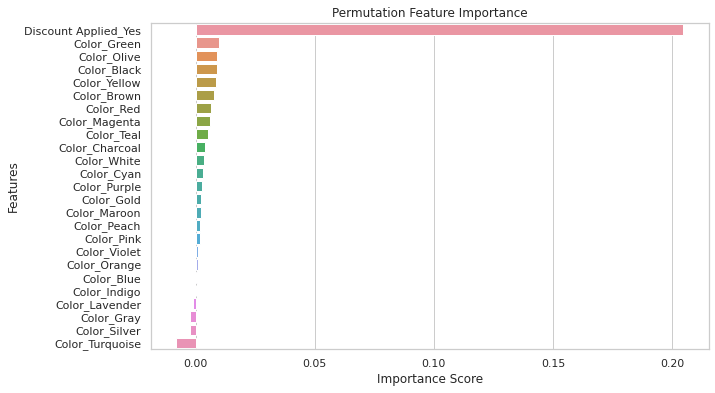

In [0]:
knn.fit(X_train, y_train)

result = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=18)

if len(X.columns) == len(result.importances_mean):
    perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
    perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

    print(perm_importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
    plt.title('Permutation Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print("Mismatch in lengths of features and importances.")

## Model 4


In [0]:
X = pd.get_dummies(df_filtered.drop(['Gender', 'Category', 'Size', 'Season', 'Color', 'Shipping Type','Age Group'], axis=1), drop_first=True)
y = df_filtered['Gender'].apply(lambda x: 1 if x == 'Female' else 0) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=15)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13, algorithm='ball_tree') 

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       924
           1       0.58      0.67      0.62       441

    accuracy                           0.73      1365
   macro avg       0.70      0.72      0.71      1365
weighted avg       0.75      0.73      0.74      1365

Accuracy: 73.33%


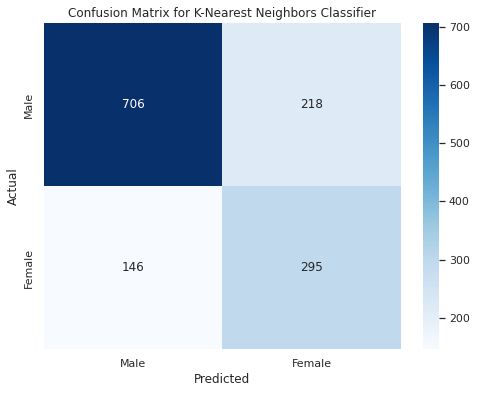

In [0]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()

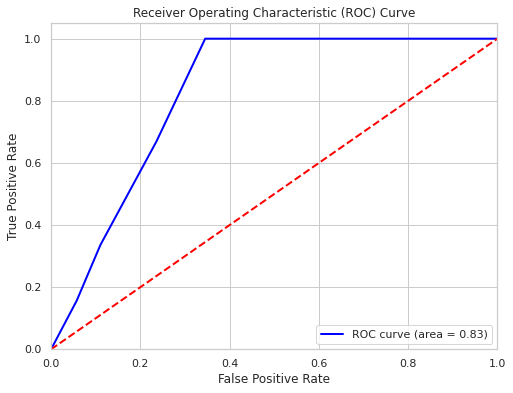

In [0]:
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

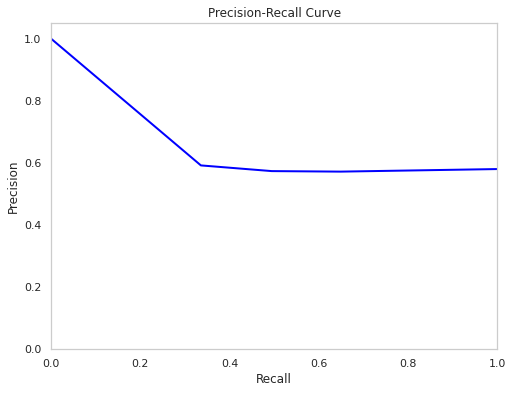

In [0]:
precision, recall, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

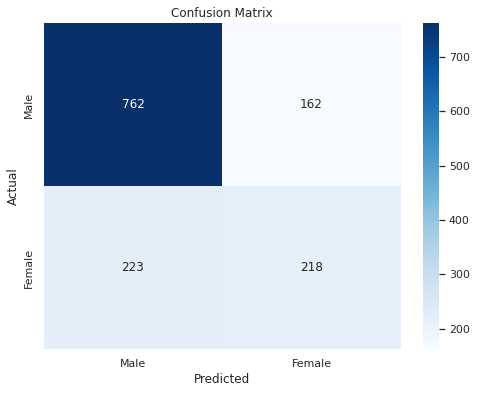

In [0]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

                      Feature  Importance
5        Discount Applied_Yes    0.138291
0         Payment Method_Cash    0.000000
1  Payment Method_Credit Card    0.000000
2   Payment Method_Debit Card   -0.002173
3       Payment Method_PayPal   -0.004884
4        Payment Method_Venmo   -0.012723


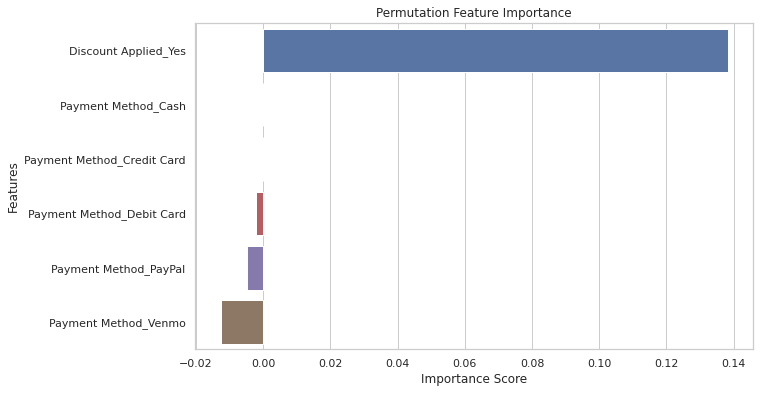

In [0]:
knn.fit(X_train, y_train)

result = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42)

if len(X.columns) == len(result.importances_mean):
    perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
    perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

    print(perm_importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
    plt.title('Permutation Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print("Mismatch in lengths of features and importances.")

# Naive Bayes Classifier

## Model 1

Accuracy: 78.46%
Classification Report:
              precision    recall  f1-score   support

      Female       0.61      1.00      0.76       260
        Male       1.00      0.68      0.81       520

    accuracy                           0.78       780
   macro avg       0.80      0.84      0.78       780
weighted avg       0.87      0.78      0.79       780



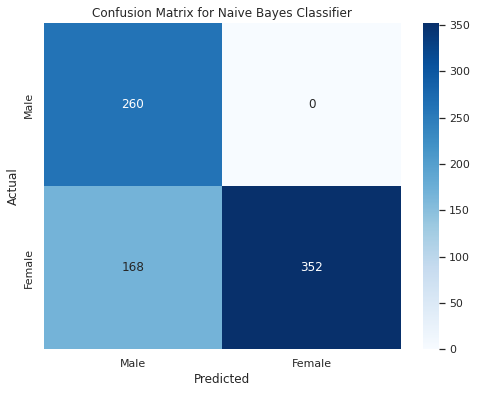

AUC Score: 0.17


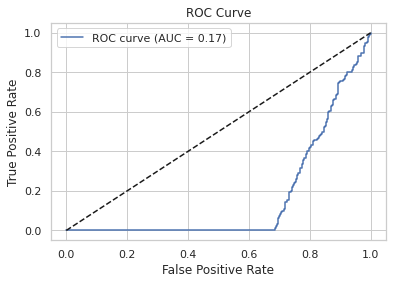

Cross-Validation Accuracy: 75.00% ± 30.81%


In [0]:
X = df_filtered[['Category', 'Size', 'Season', 'Color', 'Payment Method', 'Age Group', 'Shipping Type','Discount Applied']]
y = df_filtered['Gender']
X_dummies = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=15)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=6, scoring='accuracy')
grid_search.fit(X_train, y_train)
nb_classifier = grid_search.best_estimator_

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

if len(y.unique()) == 2:  
    y_test_binary = y_test.apply(lambda x: 1 if x == 'Female' else 0)
    y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test_binary, y_pred_proba)
    print(f"AUC Score: {auc_score:.2f}")

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

cv_scores = cross_val_score(nb_classifier, X_dummies, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")

In [0]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

chi2_values, p_values = chi2(X_dummies, y)

chi2_df = pd.DataFrame({'Feature': X_dummies.columns, 'Chi2 Stat': chi2_values, 'p-value': p_values})
chi2_df = chi2_df.sort_values(by='p-value')
print(chi2_df)

                        Feature   Chi2 Stat        p-value
49         Discount Applied_Yes  789.176471  1.217058e-173
45  Shipping Type_Free Shipping    7.414216   6.471052e-03
4                        Size_S    4.387821   3.619656e-02
35    Payment Method_Debit Card    3.664551   5.558162e-02
24                   Color_Pink    2.454633   1.171786e-01
19                Color_Magenta    2.113051   1.460478e-01
3                        Size_M    2.112033   1.461451e-01
46   Shipping Type_Next Day Air    1.898159   1.682845e-01
48   Shipping Type_Store Pickup    1.385747   2.391247e-01
41              Age Group_40-49    1.311082   2.521988e-01
29              Color_Turquoise    1.298174   2.545470e-01
25                 Color_Purple    1.215621   2.702217e-01
44        Shipping Type_Express    1.151020   2.833358e-01
13                   Color_Cyan    1.036898   3.085441e-01
32                 Color_Yellow    0.492901   4.826363e-01
34   Payment Method_Credit Card    0.469547   4.931955e-

In [0]:
class_labels = nb_classifier.classes_
for i, feature in enumerate(X_dummies.columns):
    print(f"Feature: {feature}")
    for j, label in enumerate(class_labels):
        log_odds = np.log(nb_classifier.theta_[j, i] / nb_classifier.class_prior_[j])
        print(f"  Log-Odds for {label}: {log_odds:.4f}")

Feature: Category_Clothing
  Log-Odds for Female: nan
  Log-Odds for Male: -4.9329
Feature: Category_Footwear
  Log-Odds for Female: -2.8717
  Log-Odds for Male: nan
Feature: Category_Outerwear
  Log-Odds for Female: -5.5114
  Log-Odds for Male: nan
Feature: Size_M
  Log-Odds for Female: -2.3224
  Log-Odds for Male: nan
Feature: Size_S
  Log-Odds for Female: nan
  Log-Odds for Male: -3.7410
Feature: Size_XL
  Log-Odds for Female: -3.0983
  Log-Odds for Male: nan
Feature: Season_Spring
  Log-Odds for Female: nan
  Log-Odds for Male: -4.6943
Feature: Season_Summer
  Log-Odds for Female: nan
  Log-Odds for Male: -4.4952
Feature: Season_Winter
  Log-Odds for Female: nan
  Log-Odds for Male: -4.6457
Feature: Color_Black
  Log-Odds for Female: -6.0289
  Log-Odds for Male: nan
Feature: Color_Blue
  Log-Odds for Female: -5.1084
  Log-Odds for Male: nan
Feature: Color_Brown
  Log-Odds for Female: -4.8737
  Log-Odds for Male: nan
Feature: Color_Charcoal
  Log-Odds for Female: -4.3685
  Log-Odds 

                        Feature  Importance
49         Discount Applied_Yes    0.297265
37         Payment Method_Venmo    0.000000
27                 Color_Silver    0.000000
28                   Color_Teal    0.000000
29              Color_Turquoise    0.000000
30                 Color_Violet    0.000000
31                  Color_White    0.000000
32                 Color_Yellow    0.000000
33          Payment Method_Cash    0.000000
34   Payment Method_Credit Card    0.000000
35    Payment Method_Debit Card    0.000000
36        Payment Method_PayPal    0.000000
38              Age Group_10-19    0.000000
1             Category_Footwear    0.000000
39              Age Group_20-29    0.000000
40              Age Group_30-39    0.000000
41              Age Group_40-49    0.000000
42              Age Group_50-59    0.000000
43                Age Group_60+    0.000000
44        Shipping Type_Express    0.000000
45  Shipping Type_Free Shipping    0.000000
46   Shipping Type_Next Day Air 

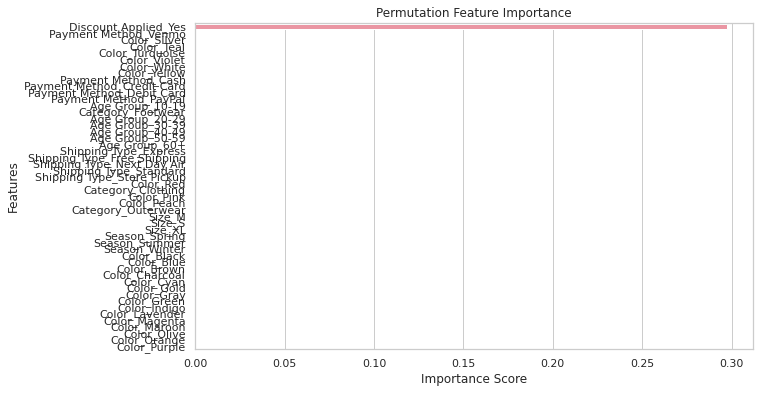

In [0]:
nb_classifier.fit(X_train, y_train)

result = permutation_importance(nb_classifier, X_test, y_test, n_repeats=30, random_state=42)

perm_importance_df = pd.DataFrame({'Feature': X_dummies.columns, 'Importance': result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
print(perm_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Model 2


Accuracy: 63.72%
Classification Report:
              precision    recall  f1-score   support

      Female       0.38      0.08      0.13       270
        Male       0.66      0.93      0.77       510

    accuracy                           0.64       780
   macro avg       0.52      0.51      0.45       780
weighted avg       0.56      0.64      0.55       780



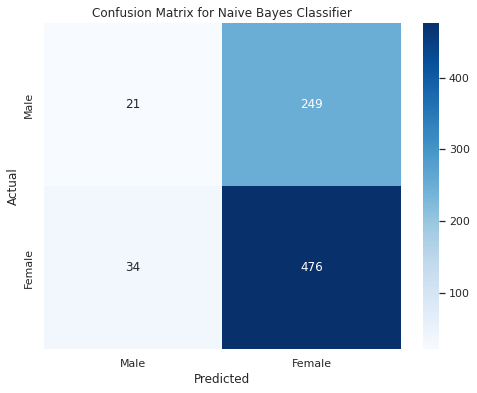

AUC Score: 0.50


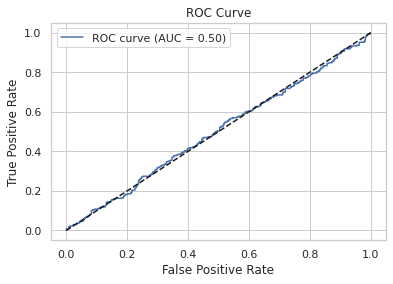

Cross-Validation Accuracy: 68.00% ± 0.06%


In [0]:
X = df_filtered[['Category', 'Size', 'Season', 'Color',  'Age Group', 'Shipping Type']]
y = df_filtered['Gender']
X_dummies = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=34)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
nb_classifier = grid_search.best_estimator_

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

if len(y.unique()) == 2:  
    y_test_binary = y_test.apply(lambda x: 1 if x == 'Female' else 0)
    y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test_binary, y_pred_proba)
    print(f"AUC Score: {auc_score:.2f}")

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

cv_scores = cross_val_score(nb_classifier, X_dummies, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")

In [0]:
chi2_values, p_values = chi2(X_dummies, y)

chi2_df = pd.DataFrame({'Feature': X_dummies.columns, 'Chi2 Stat': chi2_values, 'p-value': p_values})
chi2_df = chi2_df.sort_values(by='p-value')
print(chi2_df)

                        Feature  Chi2 Stat   p-value
40  Shipping Type_Free Shipping   7.414216  0.006471
4                        Size_S   4.387821  0.036197
24                   Color_Pink   2.454633  0.117179
19                Color_Magenta   2.113051  0.146048
3                        Size_M   2.112033  0.146145
41   Shipping Type_Next Day Air   1.898159  0.168284
43   Shipping Type_Store Pickup   1.385747  0.239125
36              Age Group_40-49   1.311082  0.252199
29              Color_Turquoise   1.298174  0.254547
25                 Color_Purple   1.215621  0.270222
39        Shipping Type_Express   1.151020  0.283336
13                   Color_Cyan   1.036898  0.308544
32                 Color_Yellow   0.492901  0.482636
1             Category_Footwear   0.411090  0.521417
26                    Color_Red   0.350556  0.553798
20                 Color_Maroon   0.344192  0.557419
10                   Color_Blue   0.341331  0.559062
14                   Color_Gold   0.332534  0.

In [0]:
class_labels = nb_classifier.classes_
for i, feature in enumerate(X_dummies.columns):
    print(f"Feature: {feature}")
    for j, label in enumerate(class_labels):
        log_odds = np.log(nb_classifier.theta_[j, i] / nb_classifier.class_prior_[j])
        print(f"  Log-Odds for {label}: {log_odds:.4f}")

Feature: Category_Clothing
  Log-Odds for Female: -4.4171
  Log-Odds for Male: nan
Feature: Category_Footwear
  Log-Odds for Female: -3.2775
  Log-Odds for Male: nan
Feature: Category_Outerwear
  Log-Odds for Female: -3.8706
  Log-Odds for Male: nan
Feature: Size_M
  Log-Odds for Female: -2.0792
  Log-Odds for Male: nan
Feature: Size_S
  Log-Odds for Female: nan
  Log-Odds for Male: -3.6046
Feature: Size_XL
  Log-Odds for Female: nan
  Log-Odds for Male: -4.1612
Feature: Season_Spring
  Log-Odds for Female: -3.0022
  Log-Odds for Male: nan
Feature: Season_Summer
  Log-Odds for Female: nan
  Log-Odds for Male: -4.3745
Feature: Season_Winter
  Log-Odds for Female: nan
  Log-Odds for Male: -4.1584
Feature: Color_Black
  Log-Odds for Female: -5.5014
  Log-Odds for Male: nan
Feature: Color_Blue
  Log-Odds for Female: -4.9000
  Log-Odds for Male: nan
Feature: Color_Brown
  Log-Odds for Female: -3.4058
  Log-Odds for Male: nan
Feature: Color_Charcoal
  Log-Odds for Female: nan
  Log-Odds for 

                        Feature  Importance
19                Color_Magenta    0.004573
36              Age Group_40-49    0.002692
1             Category_Footwear    0.002009
42       Shipping Type_Standard    0.001795
5                       Size_XL    0.001410
7                 Season_Summer    0.001026
35              Age Group_30-39    0.000983
6                 Season_Spring    0.000940
41   Shipping Type_Next Day Air    0.000855
32                 Color_Yellow    0.000556
11                  Color_Brown    0.000513
15                   Color_Gray    0.000385
20                 Color_Maroon    0.000342
9                   Color_Black    0.000299
8                 Season_Winter    0.000256
10                   Color_Blue    0.000214
24                   Color_Pink    0.000171
38                Age Group_60+    0.000085
18               Color_Lavender    0.000043
23                  Color_Peach    0.000000
39        Shipping Type_Express    0.000000
28                   Color_Teal 

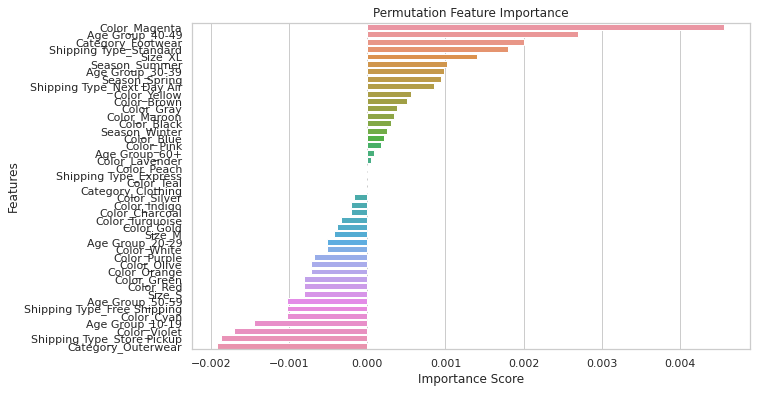

In [0]:
nb_classifier.fit(X_train, y_train)

result = permutation_importance(nb_classifier, X_test, y_test, n_repeats=30, random_state=42)

perm_importance_df = pd.DataFrame({'Feature': X_dummies.columns, 'Importance': result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
print(perm_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Model 3


Accuracy: 74.46%
Classification Report:
              precision    recall  f1-score   support

      Female       0.55      1.00      0.71       308
        Male       1.00      0.63      0.77       667

    accuracy                           0.74       975
   macro avg       0.78      0.81      0.74       975
weighted avg       0.86      0.74      0.75       975



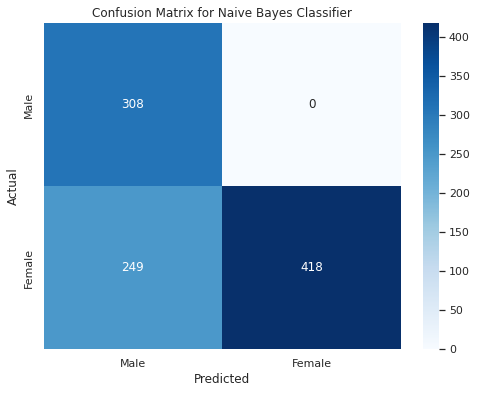

AUC Score: 0.19


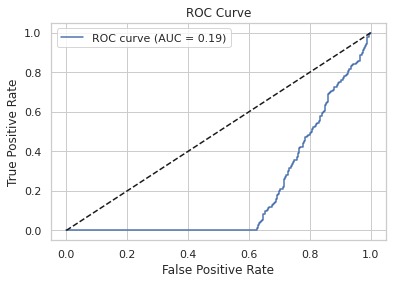

Cross-Validation Accuracy: 75.00% ± 30.81%


In [0]:
X = df_filtered[['Category', 'Size', 'Season', 'Color', 'Payment Method', 'Age Group', 'Shipping Type', 'Shipping Type','Discount Applied']]
y = df_filtered['Gender']
X_dummies = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.25, random_state=32)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
nb_classifier = grid_search.best_estimator_

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

if len(y.unique()) == 2:  
    y_test_binary = y_test.apply(lambda x: 1 if x == 'Female' else 0)
    y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test_binary, y_pred_proba)
    print(f"AUC Score: {auc_score:.2f}")

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

cv_scores = cross_val_score(nb_classifier, X_dummies, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")

In [0]:
chi2_values, p_values = chi2(X_dummies, y)

chi2_df = pd.DataFrame({'Feature': X_dummies.columns, 'Chi2 Stat': chi2_values, 'p-value': p_values})
chi2_df = chi2_df.sort_values(by='p-value')
print(chi2_df)

                        Feature   Chi2 Stat        p-value
54         Discount Applied_Yes  789.176471  1.217058e-173
45  Shipping Type_Free Shipping    7.414216   6.471052e-03
50  Shipping Type_Free Shipping    7.414216   6.471052e-03
4                        Size_S    4.387821   3.619656e-02
35    Payment Method_Debit Card    3.664551   5.558162e-02
24                   Color_Pink    2.454633   1.171786e-01
19                Color_Magenta    2.113051   1.460478e-01
3                        Size_M    2.112033   1.461451e-01
46   Shipping Type_Next Day Air    1.898159   1.682845e-01
51   Shipping Type_Next Day Air    1.898159   1.682845e-01
48   Shipping Type_Store Pickup    1.385747   2.391247e-01
53   Shipping Type_Store Pickup    1.385747   2.391247e-01
41              Age Group_40-49    1.311082   2.521988e-01
29              Color_Turquoise    1.298174   2.545470e-01
25                 Color_Purple    1.215621   2.702217e-01
49        Shipping Type_Express    1.151020   2.833358e-

In [0]:
class_labels = nb_classifier.classes_
for i, feature in enumerate(X_dummies.columns):
    print(f"Feature: {feature}")
    for j, label in enumerate(class_labels):
        log_odds = np.log(nb_classifier.theta_[j, i] / nb_classifier.class_prior_[j])
        print(f"  Log-Odds for {label}: {log_odds:.4f}")

Feature: Category_Clothing
  Log-Odds for Female: -6.0179
  Log-Odds for Male: nan
Feature: Category_Footwear
  Log-Odds for Female: -1.9557
  Log-Odds for Male: nan
Feature: Category_Outerwear
  Log-Odds for Female: nan
  Log-Odds for Male: -6.4047
Feature: Size_M
  Log-Odds for Female: -1.9504
  Log-Odds for Male: nan
Feature: Size_S
  Log-Odds for Female: nan
  Log-Odds for Male: -3.5802
Feature: Size_XL
  Log-Odds for Female: nan
  Log-Odds for Male: -4.9651
Feature: Season_Spring
  Log-Odds for Female: nan
  Log-Odds for Male: -4.5365
Feature: Season_Summer
  Log-Odds for Female: nan
  Log-Odds for Male: -4.4017
Feature: Season_Winter
  Log-Odds for Female: -4.2905
  Log-Odds for Male: nan
Feature: Color_Black
  Log-Odds for Female: -2.4000
  Log-Odds for Male: nan
Feature: Color_Blue
  Log-Odds for Female: nan
  Log-Odds for Male: -4.8960
Feature: Color_Brown
  Log-Odds for Female: -3.2151
  Log-Odds for Male: nan
Feature: Color_Charcoal
  Log-Odds for Female: nan
  Log-Odds for 

                        Feature  Importance
54         Discount Applied_Yes    0.270838
41              Age Group_40-49    0.000000
30                 Color_Violet    0.000000
31                  Color_White    0.000000
32                 Color_Yellow    0.000000
33          Payment Method_Cash    0.000000
34   Payment Method_Credit Card    0.000000
35    Payment Method_Debit Card    0.000000
36        Payment Method_PayPal    0.000000
37         Payment Method_Venmo    0.000000
38              Age Group_10-19    0.000000
39              Age Group_20-29    0.000000
40              Age Group_30-39    0.000000
42              Age Group_50-59    0.000000
28                   Color_Teal    0.000000
43                Age Group_60+    0.000000
44        Shipping Type_Express    0.000000
45  Shipping Type_Free Shipping    0.000000
46   Shipping Type_Next Day Air    0.000000
47       Shipping Type_Standard    0.000000
48   Shipping Type_Store Pickup    0.000000
49        Shipping Type_Express 

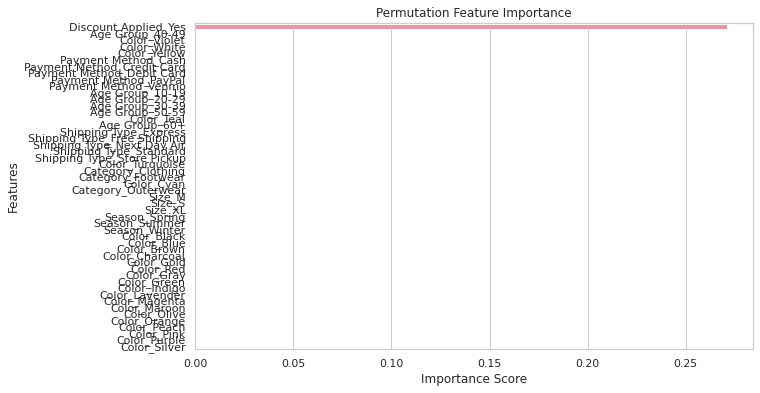

In [0]:
nb_classifier.fit(X_train, y_train)

result = permutation_importance(nb_classifier, X_test, y_test, n_repeats=30, random_state=42)

perm_importance_df = pd.DataFrame({'Feature': X_dummies.columns, 'Importance': result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
print(perm_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Model 4 

Accuracy: 74.10%
Classification Report:
              precision    recall  f1-score   support

      Female       0.55      1.00      0.71       374
        Male       1.00      0.62      0.76       796

    accuracy                           0.74      1170
   macro avg       0.78      0.81      0.74      1170
weighted avg       0.86      0.74      0.75      1170



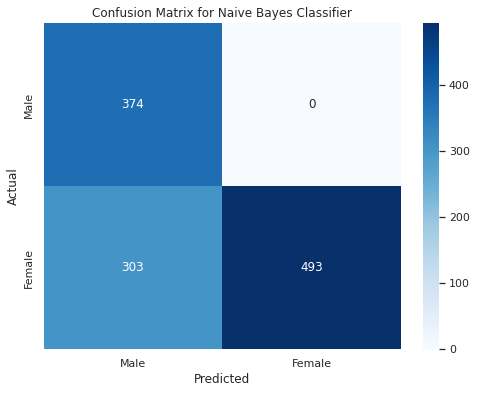

AUC Score: 0.20


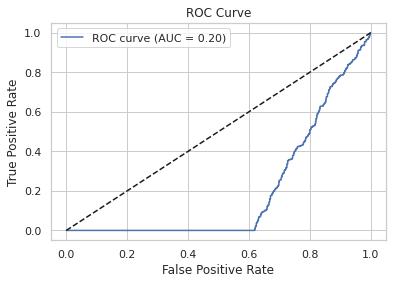

Cross-Validation Accuracy: 75.00% ± 30.81%


In [0]:
X = df_filtered[['Category', 'Size', 'Season', 'Color', 'Payment Method', 'Age Group', 'Shipping Type', 'Discount Applied']]
y = df_filtered['Gender']
X_dummies = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.30, random_state=36)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)
nb_classifier = grid_search.best_estimator_

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

if len(y.unique()) == 2:  
    y_test_binary = y_test.apply(lambda x: 1 if x == 'Female' else 0)
    y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test_binary, y_pred_proba)
    print(f"AUC Score: {auc_score:.2f}")

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

cv_scores = cross_val_score(nb_classifier, X_dummies, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")

In [0]:
chi2_values, p_values = chi2(X_dummies, y)

chi2_df = pd.DataFrame({'Feature': X_dummies.columns, 'Chi2 Stat': chi2_values, 'p-value': p_values})
chi2_df = chi2_df.sort_values(by='p-value')
print(chi2_df)

                        Feature   Chi2 Stat        p-value
49         Discount Applied_Yes  789.176471  1.217058e-173
45  Shipping Type_Free Shipping    7.414216   6.471052e-03
4                        Size_S    4.387821   3.619656e-02
35    Payment Method_Debit Card    3.664551   5.558162e-02
24                   Color_Pink    2.454633   1.171786e-01
19                Color_Magenta    2.113051   1.460478e-01
3                        Size_M    2.112033   1.461451e-01
46   Shipping Type_Next Day Air    1.898159   1.682845e-01
48   Shipping Type_Store Pickup    1.385747   2.391247e-01
41              Age Group_40-49    1.311082   2.521988e-01
29              Color_Turquoise    1.298174   2.545470e-01
25                 Color_Purple    1.215621   2.702217e-01
44        Shipping Type_Express    1.151020   2.833358e-01
13                   Color_Cyan    1.036898   3.085441e-01
32                 Color_Yellow    0.492901   4.826363e-01
34   Payment Method_Credit Card    0.469547   4.931955e-

In [0]:
class_labels = nb_classifier.classes_
for i, feature in enumerate(X_dummies.columns):
    print(f"Feature: {feature}")
    for j, label in enumerate(class_labels):
        log_odds = np.log(nb_classifier.theta_[j, i] / nb_classifier.class_prior_[j])
        print(f"  Log-Odds for {label}: {log_odds:.4f}")

Feature: Category_Clothing
  Log-Odds for Female: -6.0074
  Log-Odds for Male: nan
Feature: Category_Footwear
  Log-Odds for Female: -2.3232
  Log-Odds for Male: nan
Feature: Category_Outerwear
  Log-Odds for Female: nan
  Log-Odds for Male: -3.6461
Feature: Size_M
  Log-Odds for Female: -1.9346
  Log-Odds for Male: nan
Feature: Size_S
  Log-Odds for Female: nan
  Log-Odds for Male: -3.2104
Feature: Size_XL
  Log-Odds for Female: -2.8604
  Log-Odds for Male: nan
Feature: Season_Spring
  Log-Odds for Female: -4.2183
  Log-Odds for Male: nan
Feature: Season_Summer
  Log-Odds for Female: nan
  Log-Odds for Male: -4.2554
Feature: Season_Winter
  Log-Odds for Female: nan
  Log-Odds for Male: -8.2753
Feature: Color_Black
  Log-Odds for Female: -3.6036
  Log-Odds for Male: nan
Feature: Color_Blue
  Log-Odds for Female: -2.8693
  Log-Odds for Male: nan
Feature: Color_Brown
  Log-Odds for Female: nan
  Log-Odds for Male: -5.7577
Feature: Color_Charcoal
  Log-Odds for Female: nan
  Log-Odds for 

                        Feature  Importance
49         Discount Applied_Yes    0.271225
37         Payment Method_Venmo    0.000000
27                 Color_Silver    0.000000
28                   Color_Teal    0.000000
29              Color_Turquoise    0.000000
30                 Color_Violet    0.000000
31                  Color_White    0.000000
32                 Color_Yellow    0.000000
33          Payment Method_Cash    0.000000
34   Payment Method_Credit Card    0.000000
35    Payment Method_Debit Card    0.000000
36        Payment Method_PayPal    0.000000
38              Age Group_10-19    0.000000
1             Category_Footwear    0.000000
39              Age Group_20-29    0.000000
40              Age Group_30-39    0.000000
41              Age Group_40-49    0.000000
42              Age Group_50-59    0.000000
43                Age Group_60+    0.000000
44        Shipping Type_Express    0.000000
45  Shipping Type_Free Shipping    0.000000
46   Shipping Type_Next Day Air 

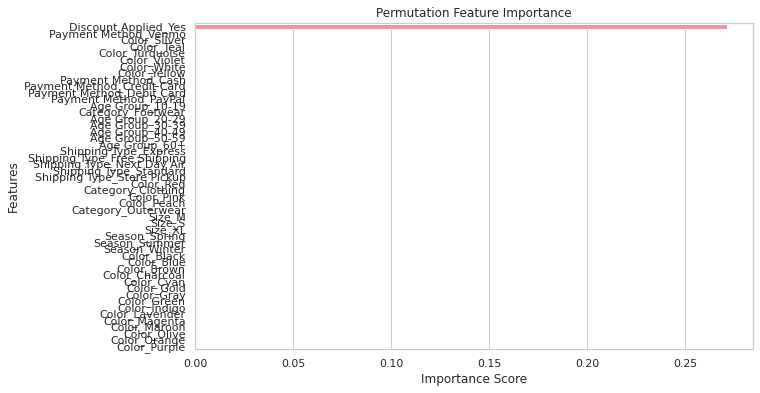

In [0]:
nb_classifier.fit(X_train, y_train)

result = permutation_importance(nb_classifier, X_test, y_test, n_repeats=30, random_state=42)

perm_importance_df = pd.DataFrame({'Feature': X_dummies.columns, 'Importance': result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
print(perm_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()